<a href="https://colab.research.google.com/github/Fhavee/Codsoft/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [1]:
import pandas as pd


In [3]:
advertising = pd.read_csv("/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## **examine the data**

In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


as can be seen, the data has no null values


## **exploratory data analysis**

dependent variable (y) = sales

independent variables (x) = TV, radio, newspaper

In [7]:
corr_matrix = advertising.corr()
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


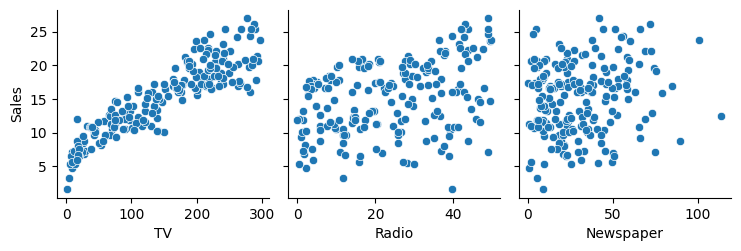

In [8]:
import seaborn as sns
sns.pairplot (advertising, x_vars=['TV', 'Radio', 'Newspaper'],
              y_vars='Sales', kind= 'scatter')

from EDA conducted, TV and Radio have better correlations with Sales compared to Newspaper


## **split data as x and y**

In [9]:
y = advertising['Sales']
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [10]:
x = advertising.drop('Sales', axis=1)
x
x = x.drop('Newspaper', axis=1)
print(x)

        TV  Radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
..     ...    ...
195   38.2    3.7
196   94.2    4.9
197  177.0    9.3
198  283.6   42.0
199  232.1    8.6

[200 rows x 2 columns]


**split the data for training and testing**

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [12]:
print(x_train)

        TV  Radio
168  215.4   23.6
112  175.7   15.4
171  164.5   20.9
181  218.5    5.4
7    120.2   19.6
..     ...    ...
87   110.7   40.6
103  187.9   17.2
67   139.3   14.5
24    62.3   12.6
8      8.6    2.1

[160 rows x 2 columns]


In [13]:
print(y_train)

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 160, dtype: float64


In [14]:
print(x_test)

        TV  Radio
126    7.8   38.9
104  238.2   34.3
99   135.2   41.7
92   217.7   33.5
111  241.7   38.0
167  206.8    5.2
116  139.2   14.3
96   197.6    3.5
52   216.4   41.7
69   216.8   43.9
164  117.2   14.7
124  229.5   32.3
182   56.2    5.7
154  187.8   21.1
125   87.2   11.8
196   94.2    4.9
194  149.7   35.6
177  170.2    7.8
163  163.5   36.8
31   112.9   17.4
11   214.7   24.0
73   129.4    5.7
15   195.4   47.7
41   177.0   33.4
97   184.9   21.0
128  220.3   49.0
133  219.8   33.5
82    75.3   20.3
139  184.9   43.9
123  123.1   34.6
83    68.4   44.5
65    69.0    9.3
151  121.0    8.4
162  188.4   18.1
170   50.0   11.6
77   120.5   28.5
32    97.2    1.5
173  168.4    7.1
174  222.4    3.4
85   193.2   18.4


In [15]:
print(y_test)

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
Name: Sales, dtype: float64


# **build the model**

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

# **apply the model**

In [18]:
y_reg_train_pred = reg.predict(x_train)
y_reg_test_pred = reg.predict(x_test)

In [19]:
print(y_reg_train_pred)

[18.67769619 15.64421794 15.64298689 16.85396678 13.11660604 10.41420791
 10.19293078 20.85806438 10.05342714  6.96440519 17.84124301 18.06515105
 12.37368119 16.24066611 19.07003971 11.19710836  5.87794756 10.14711101
 17.68690013 13.03166388 18.67942943 17.17452298 20.46947174 15.39921321
 12.26769132  8.82014181 17.85813547 12.04506316  7.29787629 17.55308951
 13.9339669   8.66555446 10.95665451 15.76730026 15.64117362 18.2242715
 17.93590021  8.69564622 19.28757922 17.49633254  9.62368559 12.15579502
 24.42608746 15.03967238 16.38846714 20.00214556  8.70312582 20.49280386
 17.92768284 24.68526919 10.9572634  20.89796446 15.30474713 13.92710945
 11.1858423  21.79208569 19.03573935 17.83834097 18.45966338 15.54130344
 18.63917381 20.59754052 24.75469659 15.59598942 19.07806597 10.31349328
 20.9640143  15.04540986 16.82185739 20.61147305 19.64720008  6.95325911
  9.16934092 20.68866899 11.1248811  20.98568869  6.15885703 21.13119205
 13.83111013 16.74868348 20.69725515 23.33479454  6.

In [20]:
print(y_reg_test_pred)

[ 9.17818934 21.07505724 16.34101631 19.88426296 21.66810117 16.20240597
 13.55950243 15.52133562 20.71114775 20.97329377 12.41922545 20.38808499
  8.15189743 16.9188522  10.48746623 10.10953528 16.45422806 14.51698472
 17.32818146 12.48310648 18.68377142 12.09147405 20.23717301 17.68287811
 16.75183888 21.71945842 19.9972836  10.77667746 19.25645642 14.91326134
 13.052125    9.23452415 11.93469573 16.62302797  8.46351192 14.10616215
  9.89912872 14.34354952 16.84511837 16.91417245]


# **evaluate the model**

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

reg_train_mse = mean_squared_error(y_train, y_reg_train_pred)
reg_train_r2 = r2_score(y_train, y_reg_train_pred)


reg_test_mse = mean_squared_error(y_test, y_reg_test_pred)
reg_test_r2 = r2_score(y_test, y_reg_test_pred)

In [22]:
print(reg_train_mse)

2.613188549988596


In [23]:
print(reg_train_r2)

0.8353942312421215


In [24]:
print(reg_test_mse)

3.2383551310812466


In [28]:
print(reg_test_r2)

0.8353942312421215
